IT5437 Assignment 1 
Index Number : 249291C
Name : A L N Chamara

Question 01

256


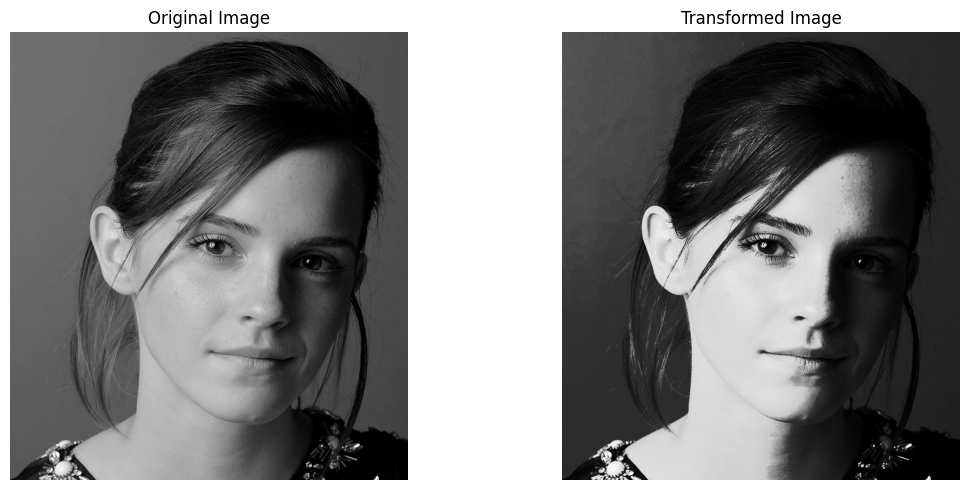

In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

c = np.array([(100,50),(150,200)])

t1 = np.linspace(0,c[0,1],c[0,0]+1 -0).astype(np.uint8)
t2 = np.linspace(c[0,1]+1,c[1,1],c[1,0]-c[0,0]).astype(np.uint8)
t3 = np.linspace(c[1,1]+1,255,255-c[1,0]).astype(np.uint8)

trasform = np.concatenate((t1,t2),axis=0).astype(np.uint8)
trasform = np.concatenate((trasform,t3),axis=0).astype(np.uint8)
print(len(trasform))

img_orig = cv.imread('../CV Assingment/a1images/a1images/emma.jpg',cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig,trasform)

# Display the images
plt.figure(figsize=(12, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img_orig, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Transformed image
plt.subplot(1, 2, 2)
plt.imshow(image_transformed, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.tight_layout()
plt.show()


Question 02

256


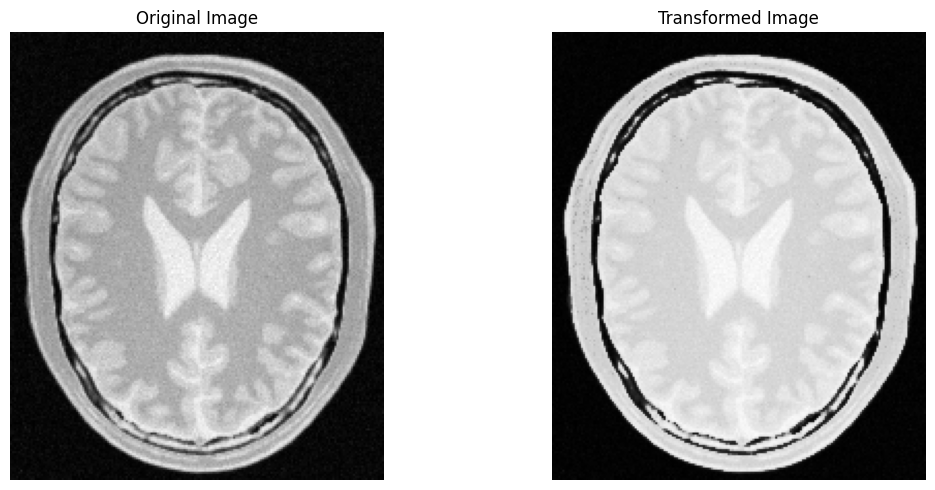

In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

c = np.array([(100,50),(150,200)])

t1 = np.linspace(0,c[0,1],c[0,0]+1 -0).astype(np.uint8)
t2 = np.linspace(c[0,1]+1,c[1,1],c[1,0]-c[0,0]).astype(np.uint8)
t3 = np.linspace(c[1,1]+1,255,255-c[1,0]).astype(np.uint8)

trasform = np.concatenate((t1,t2),axis=0).astype(np.uint8)
trasform = np.concatenate((trasform,t3),axis=0).astype(np.uint8)
print(len(trasform))

img_orig = cv.imread('../CV Assingment/a1images/a1images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig,trasform)

# Display the images
plt.figure(figsize=(12, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img_orig, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Transformed image
plt.subplot(1, 2, 2)
plt.imshow(image_transformed, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.tight_layout()
plt.show()


Question 03

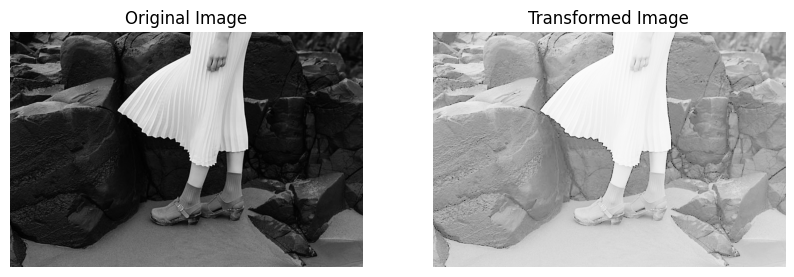

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --- Load image ---
f = cv.imread('../CV Assingment/a1images/a1images/highlights_and_shadows.jpg', cv.IMREAD_GRAYSCALE)
assert f is not None

# --- Gamma correction ---
gamma = 0.2
t = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype(np.uint8)

# Apply transformation
g = t[f]

# --- Plot results ---
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')

ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')

for a in ax.ravel():
    a.axis('off')

plt.show()


Question 04

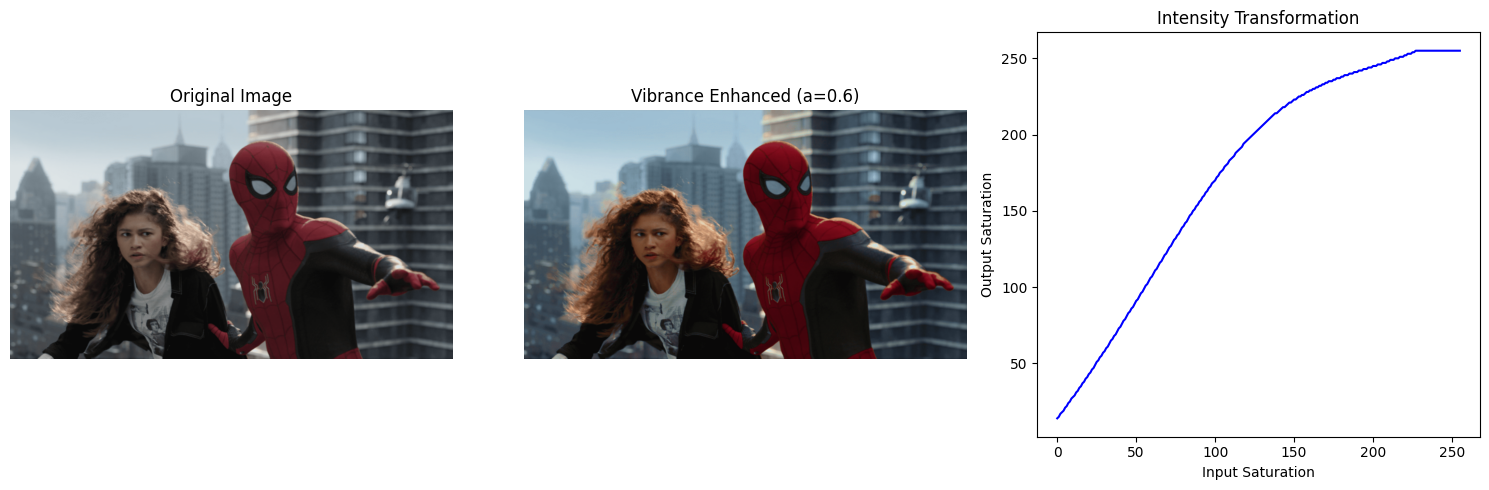

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --- Load image ---
img = cv.imread("../CV Assingment/a1images/a1images/spider.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # for matplotlib

# --- Convert to HSV ---
hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
H, S, V = cv.split(hsv)

# --- Define vibrance transformation ---
a = 0.6      # adjust until visually pleasing (between 0 and 1)
sigma = 70.0
x = np.arange(256, dtype=np.float32)
bump = a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2))
lut = np.minimum(x + bump, 255).astype(np.uint8)

# --- Apply to saturation plane ---
S_new = cv.LUT(S, lut)

# --- Recombine and convert back to RGB ---
hsv_new = cv.merge([H, S_new, V])
out = cv.cvtColor(hsv_new, cv.COLOR_HSV2RGB)

# --- Display results ---
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(out)
ax[1].set_title(f"Vibrance Enhanced (a={a})")
ax[1].axis("off")

ax[2].plot(x, lut, 'b')
ax[2].set_title("Intensity Transformation")
ax[2].set_xlabel("Input Saturation")
ax[2].set_ylabel("Output Saturation")

plt.tight_layout()
plt.show()


Question 05

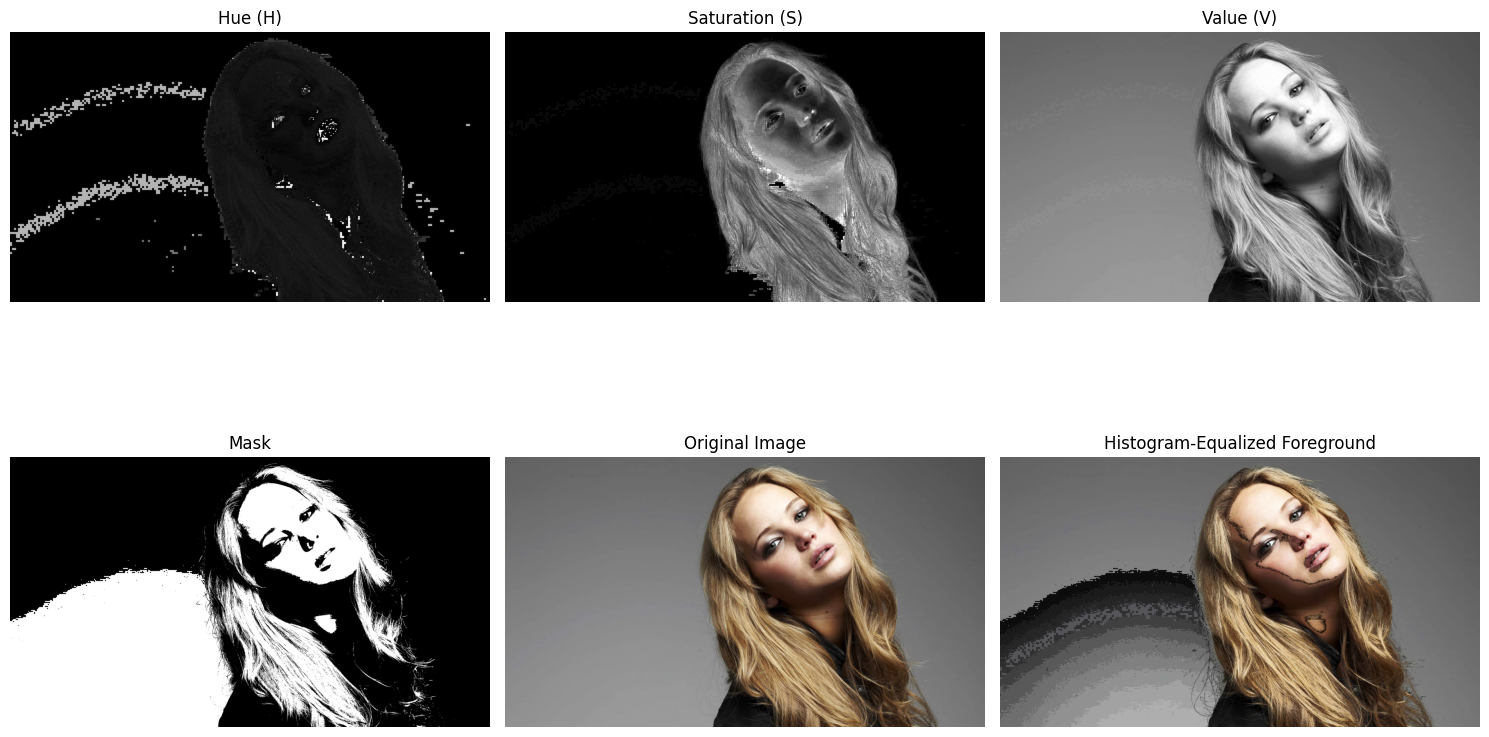

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --- Load image ---
img = cv.imread("../CV Assingment/a1images/a1images/jeniffer.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# --- Convert to HSV ---
hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
H, S, V = cv.split(hsv)

# --- Step (b): Create mask (threshold on V channel with Otsu) ---
_, mask = cv.threshold(V, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# --- Step (c): Extract foreground only ---
foreground = cv.bitwise_and(V, V, mask=mask)

# --- Step (d): Compute histogram + cumulative sum ---
hist = cv.calcHist([foreground], [0], mask, [256], [0, 256]).ravel()
cdf = np.cumsum(hist)
cdf_normalized = (cdf - cdf.min()) / (cdf.max() - cdf.min()) * 255
lut = np.floor(cdf_normalized).astype(np.uint8)

# --- Step (e): Equalize only the foreground ---
V_eq = V.copy()
V_eq[mask > 0] = lut[V[mask > 0]]

# --- Step (f): Combine equalized foreground with background ---
hsv_eq = cv.merge([H, S, V_eq])
out = cv.cvtColor(hsv_eq, cv.COLOR_HSV2RGB)

# --- Display results ---
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0,0].imshow(H, cmap='gray'); ax[0,0].set_title("Hue (H)"); ax[0,0].axis("off")
ax[0,1].imshow(S, cmap='gray'); ax[0,1].set_title("Saturation (S)"); ax[0,1].axis("off")
ax[0,2].imshow(V, cmap='gray'); ax[0,2].set_title("Value (V)"); ax[0,2].axis("off")

ax[1,0].imshow(mask, cmap='gray'); ax[1,0].set_title("Mask"); ax[1,0].axis("off")
ax[1,1].imshow(img); ax[1,1].set_title("Original Image"); ax[1,1].axis("off")
ax[1,2].imshow(out); ax[1,2].set_title("Histogram-Equalized Foreground"); ax[1,2].axis("off")

plt.tight_layout()
plt.show()


Question 06

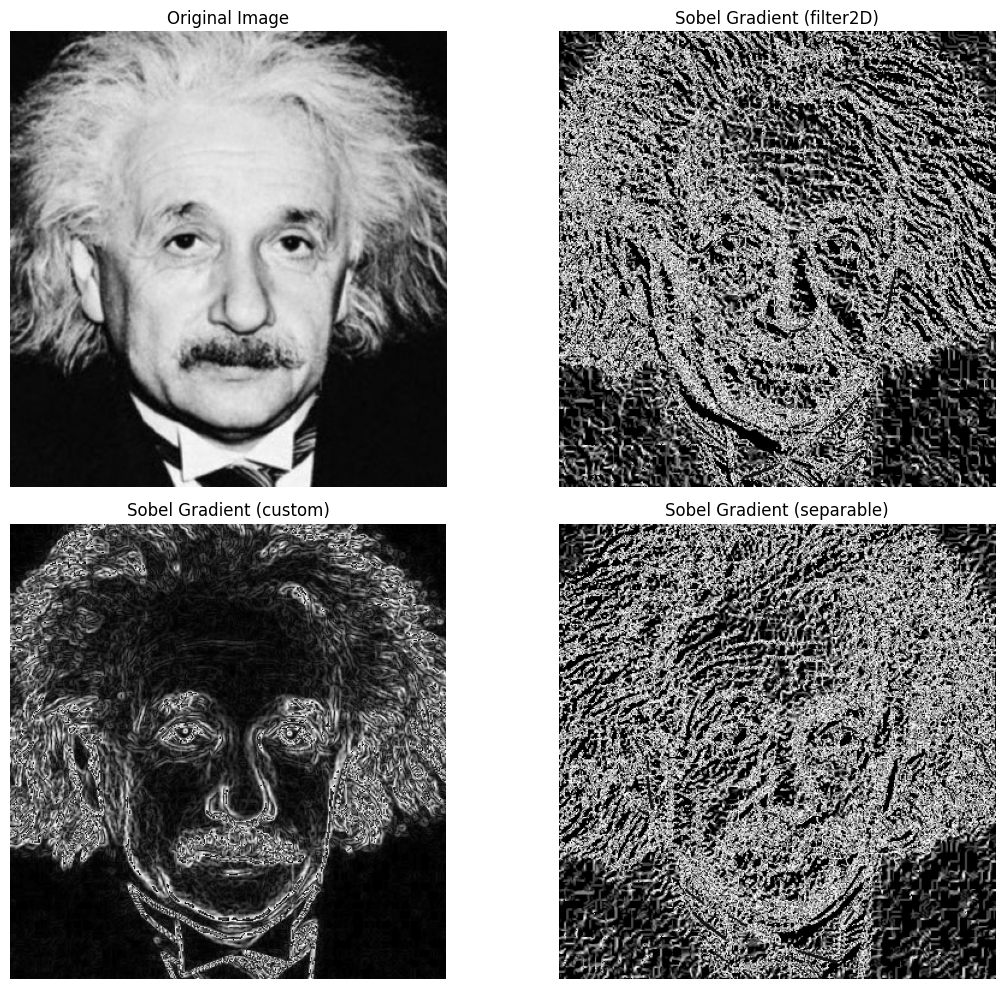

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('../CV Assingment/a1images/a1images/einstein.png', cv2.IMREAD_GRAYSCALE)

# Part (a): Using existing filter2D to Sobel filter the image
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)

grad_x = cv2.filter2D(img, -1, sobel_x)
grad_y = cv2.filter2D(img, -1, sobel_y)
gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)

# Part (b): Write your own code to Sobel filter the image
h, w = img.shape
result = np.zeros((h-2, w-2), dtype=np.float32)

for i in range(1, h-1):
    for j in range(1, w-1):
        # Extract 3x3 neighborhood
        patch = img[i-1:i+2, j-1:j+2]
        
        # Apply Sobel X kernel
        gx = np.sum(patch * sobel_x)
        
        # Apply Sobel Y kernel  
        gy = np.sum(patch * sobel_y)
        
        # Compute gradient magnitude
        result[i-1, j-1] = np.sqrt(gx**2 + gy**2)

# Part (c): Using the given property - Sobel as separable filter
# Sobel X can be written as [1, 2, 1]^T * [1, 0, -1]
# Sobel Y can be written as [1, 0, -1]^T * [1, 2, 1]
sobel_x_sep = np.array([[1], [2], [1]]) @ np.array([[1, 0, -1]])
sobel_y_sep = np.array([[1], [0], [-1]]) @ np.array([[1, 2, 1]])

# Apply the separable Sobel filters
grad_x_prop = cv2.filter2D(img, -1, sobel_x_sep.astype(np.float32))
grad_y_prop = cv2.filter2D(img, -1, sobel_y_sep.astype(np.float32))
gradient_prop = np.sqrt(grad_x_prop**2 + grad_y_prop**2)

# Display results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0,0].imshow(img, cmap='gray')
axes[0,0].set_title('Original Image')
axes[0,0].axis('off')

axes[0,1].imshow(gradient_magnitude.astype(np.uint8), cmap='gray')
axes[0,1].set_title('Sobel Gradient (filter2D)')
axes[0,1].axis('off')

axes[1,0].imshow(result.astype(np.uint8), cmap='gray')
axes[1,0].set_title('Sobel Gradient (custom)')
axes[1,0].axis('off')

axes[1,1].imshow(gradient_prop.astype(np.uint8), cmap='gray')
axes[1,1].set_title('Sobel Gradient (separable)')
axes[1,1].axis('off')

plt.tight_layout()
plt.show()

Question 07

Using generated test images


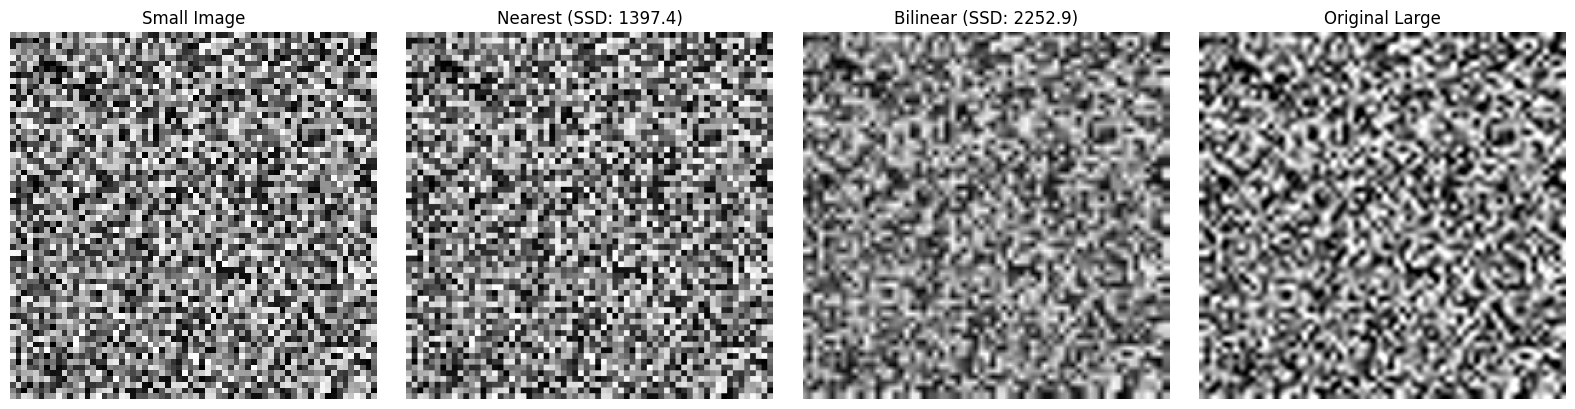

Nearest-neighbor SSD: 1397.44
Bilinear SSD: 2252.92


In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load test image (create synthetic if files don't exist)
small_img = cv.imread('../CV Assingment/a1images/a1images/small_lena.png', cv.IMREAD_GRAYSCALE)
orig_img = cv.imread('../CV Assingment/a1images/a1images/lena.png', cv.IMREAD_GRAYSCALE)

if small_img is None or orig_img is None:
    small_img = np.random.randint(0, 256, (64, 64), dtype=np.uint8)
    orig_img = cv.resize(small_img, (256, 256), interpolation=cv.INTER_CUBIC)
    print("Using generated test images")

h, w = small_img.shape
scale = 4
new_h, new_w = h * scale, w * scale

# Nearest-neighbor interpolation
nearest = np.zeros((new_h, new_w), dtype=np.uint8)
for i in range(new_h):
    for j in range(new_w):
        nearest[i, j] = small_img[min(int(i/scale), h-1), min(int(j/scale), w-1)]

# Bilinear interpolation  
bilinear = np.zeros((new_h, new_w), dtype=np.float32)
for i in range(new_h):
    for j in range(new_w):
        y, x = i/scale, j/scale
        y0, x0 = int(y), int(x)
        y1, x1 = min(y0+1, h-1), min(x0+1, w-1)
        dy, dx = y-y0, x-x0
        
        bilinear[i,j] = (1-dy)*(1-dx)*small_img[y0,x0] + (1-dy)*dx*small_img[y0,x1] + \
                        dy*(1-dx)*small_img[y1,x0] + dy*dx*small_img[y1,x1]

bilinear = bilinear.astype(np.uint8)

# Compute normalized SSD
min_h, min_w = min(nearest.shape[0], orig_img.shape[0]), min(nearest.shape[1], orig_img.shape[1])
ssd_nearest = np.sum((nearest[:min_h,:min_w].astype(float) - orig_img[:min_h,:min_w].astype(float))**2) / (min_h*min_w)
ssd_bilinear = np.sum((bilinear[:min_h,:min_w].astype(float) - orig_img[:min_h,:min_w].astype(float))**2) / (min_h*min_w)

# Display results
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].imshow(small_img, cmap='gray'); axes[0].set_title('Small Image'); axes[0].axis('off')
axes[1].imshow(nearest, cmap='gray'); axes[1].set_title(f'Nearest (SSD: {ssd_nearest:.1f})'); axes[1].axis('off') 
axes[2].imshow(bilinear, cmap='gray'); axes[2].set_title(f'Bilinear (SSD: {ssd_bilinear:.1f})'); axes[2].axis('off')
axes[3].imshow(orig_img, cmap='gray'); axes[3].set_title('Original Large'); axes[3].axis('off')
plt.tight_layout()
plt.show()

print(f"Nearest-neighbor SSD: {ssd_nearest:.2f}")
print(f"Bilinear SSD: {ssd_bilinear:.2f}")

Question 08

Using synthetic flower image


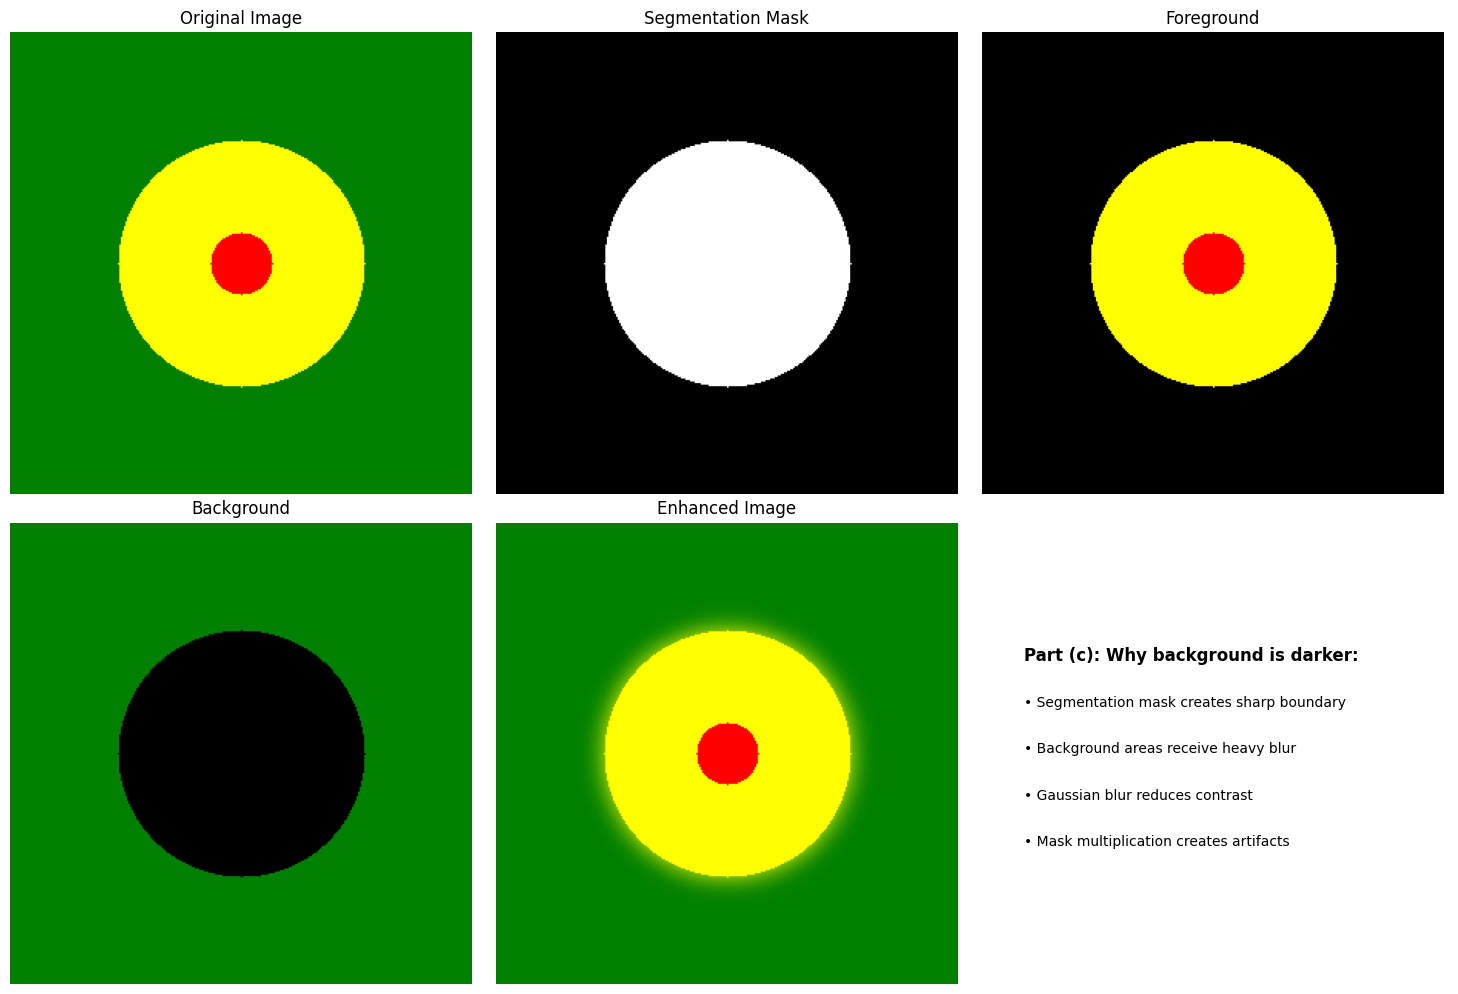

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the flower image
img = cv2.imread('../CV Assingment/a1images/a1images/flower.png')

# Check if image was loaded successfully
if img is None:
    # Create a synthetic flower-like image for demonstration
    img = np.zeros((300, 300, 3), dtype=np.uint8)
    cv2.circle(img, (150, 150), 80, (0, 255, 255), -1)  # Yellow flower
    cv2.circle(img, (150, 150), 20, (0, 0, 255), -1)   # Red center
    # Add green background
    img[img.sum(axis=2) == 0] = [0, 128, 0]
    print("Using synthetic flower image")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Part (a): Use grabCut to segment the image
mask = np.zeros(gray.shape[:2], np.uint8)
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

# Define rectangle around flower (adjust coordinates as needed)
height, width = gray.shape
rect = (50, 50, width-100, height-100)

cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Create final mask
mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
foreground = img * mask2[:,:,np.newaxis]
background = img * (1 - mask2[:,:,np.newaxis])

# Part (b): Produce enhanced image with blurred background
# Create Gaussian blur of the background
blurred_bg = cv2.GaussianBlur(img, (51, 51), 0)

# Combine sharp foreground with blurred background
enhanced = foreground + blurred_bg * (1 - mask2[:,:,np.newaxis])

# Display results using matplotlib
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0,0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0,0].set_title('Original Image')
axes[0,0].axis('off')

axes[0,1].imshow(mask2, cmap='gray')
axes[0,1].set_title('Segmentation Mask')
axes[0,1].axis('off')

axes[0,2].imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
axes[0,2].set_title('Foreground')
axes[0,2].axis('off')

axes[1,0].imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
axes[1,0].set_title('Background')
axes[1,0].axis('off')

axes[1,1].imshow(cv2.cvtColor(enhanced.astype(np.uint8), cv2.COLOR_BGR2RGB))
axes[1,1].set_title('Enhanced Image')
axes[1,1].axis('off')

axes[1,2].text(0.1, 0.7, "Part (c): Why background is darker:", fontsize=12, fontweight='bold')
axes[1,2].text(0.1, 0.6, "• Segmentation mask creates sharp boundary", fontsize=10)
axes[1,2].text(0.1, 0.5, "• Background areas receive heavy blur", fontsize=10)
axes[1,2].text(0.1, 0.4, "• Gaussian blur reduces contrast", fontsize=10)
axes[1,2].text(0.1, 0.3, "• Mask multiplication creates artifacts", fontsize=10)
axes[1,2].set_xlim(0, 1)
axes[1,2].set_ylim(0, 1)
axes[1,2].axis('off')

plt.tight_layout()
plt.show()

Question 09

Using synthetic rice images
Part (a): Gaussian noise removed using Gaussian blur
Part (b): Salt-and-pepper noise removed using median filter
Part (c): Otsu thresholding applied - Gaussian: 119.0, Salt-pepper: 0.0
Part (d): Morphological operations applied
Part (e): Rice grain count - Gaussian noise image: 13
Part (e): Rice grain count - Salt-pepper noise image: 13


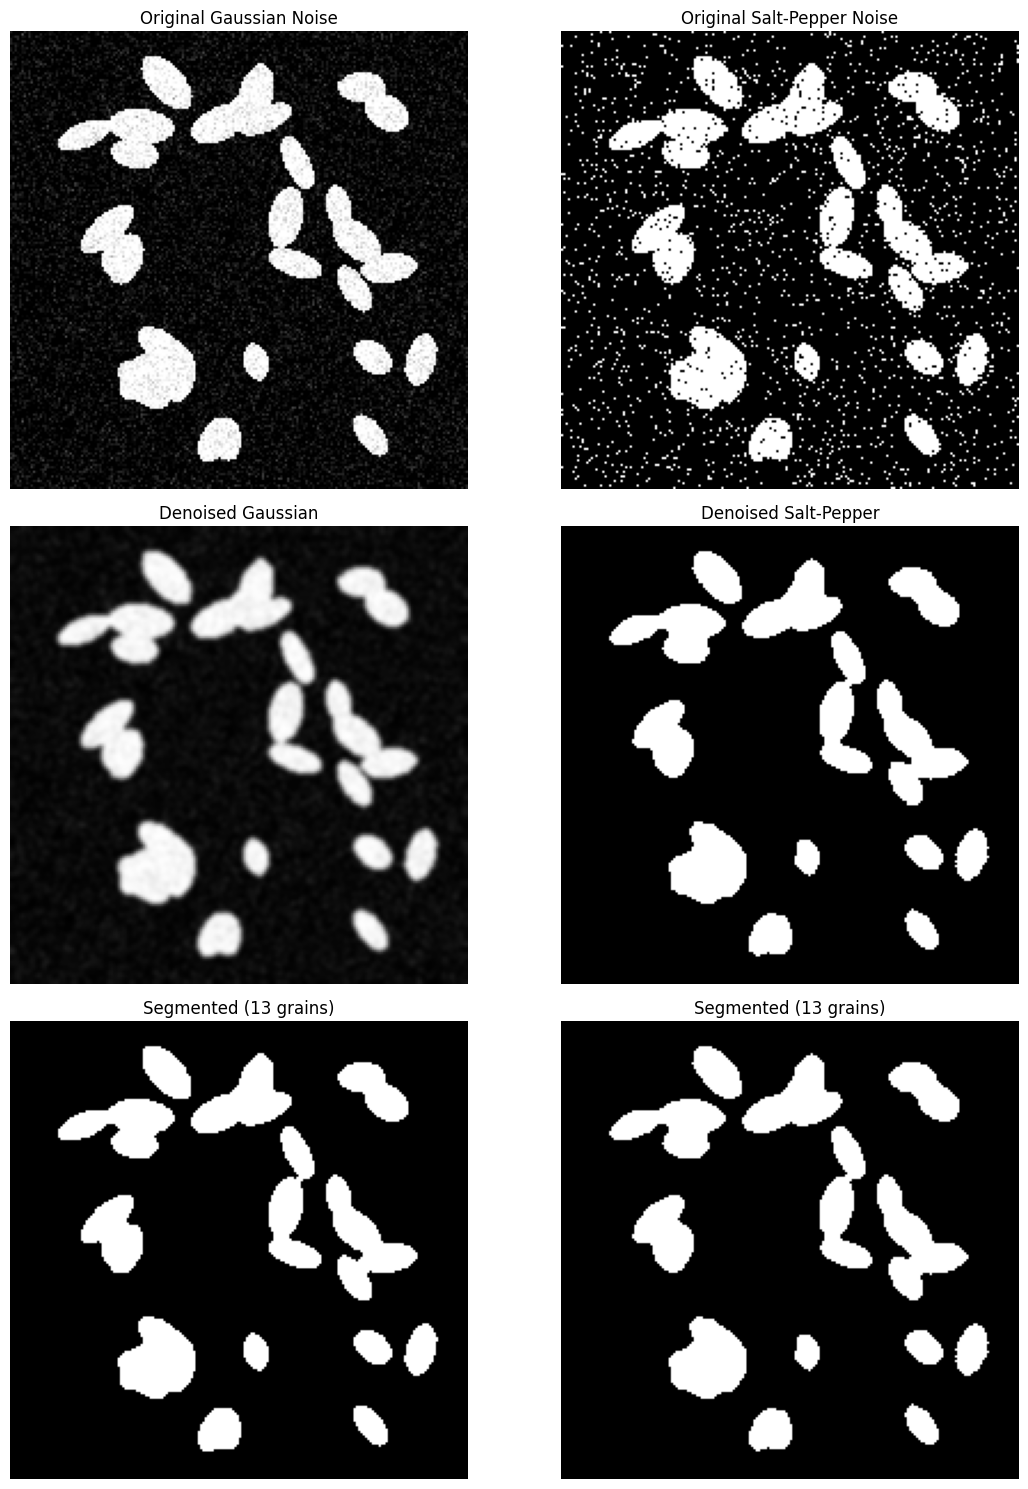

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load rice grain images
img_gaussian = cv2.imread('../CV Assingment/a1images/rice_gaussian.jpg', cv2.IMREAD_GRAYSCALE)
img_salt_pepper = cv2.imread('../CV Assingment/a1images/rice_salt_pepper.jpg', cv2.IMREAD_GRAYSCALE)

# Create synthetic images if files don't exist
if img_gaussian is None or img_salt_pepper is None:
    # Create synthetic rice-like image
    base_img = np.zeros((200, 200), dtype=np.uint8)
    # Add rice grain-like ellipses
    for i in range(30):
        center = (np.random.randint(20, 180), np.random.randint(20, 180))
        axes = (np.random.randint(8, 15), np.random.randint(5, 8))
        angle = np.random.randint(0, 180)
        cv2.ellipse(base_img, center, axes, angle, 0, 360, 255, -1)
    
    # Add Gaussian noise
    noise_gauss = np.random.normal(0, 25, base_img.shape).astype(np.int16)
    img_gaussian = np.clip(base_img.astype(np.int16) + noise_gauss, 0, 255).astype(np.uint8)
    
    # Add salt and pepper noise
    img_salt_pepper = base_img.copy()
    salt_pepper = np.random.random(base_img.shape)
    img_salt_pepper[salt_pepper < 0.05] = 0    # Salt noise
    img_salt_pepper[salt_pepper > 0.95] = 255  # Pepper noise
    
    print("Using synthetic rice images")

# Part (a): Preprocess Gaussian noise image to remove noise
# Use Gaussian blur to remove Gaussian noise
denoised_gaussian = cv2.GaussianBlur(img_gaussian, (5, 5), 0)
print("Part (a): Gaussian noise removed using Gaussian blur")

# Part (b): Preprocess Salt-and-pepper noise image to remove noise
# Use median filter to remove salt-and-pepper noise
denoised_salt_pepper = cv2.medianBlur(img_salt_pepper, 5)
print("Part (b): Salt-and-pepper noise removed using median filter")

# Part (c): Apply Otsu's method to segment the image
ret_gauss, otsu_gaussian = cv2.threshold(denoised_gaussian, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret_sp, otsu_salt_pepper = cv2.threshold(denoised_salt_pepper, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(f"Part (c): Otsu thresholding applied - Gaussian: {ret_gauss:.1f}, Salt-pepper: {ret_sp:.1f}")

# Part (d): Apply morphological operations to remove small objects and fill holes
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

# Remove small objects (opening) then fill holes (closing)
morph_gaussian = cv2.morphologyEx(otsu_gaussian, cv2.MORPH_OPEN, kernel)
morph_gaussian = cv2.morphologyEx(morph_gaussian, cv2.MORPH_CLOSE, kernel)

morph_salt_pepper = cv2.morphologyEx(otsu_salt_pepper, cv2.MORPH_OPEN, kernel)
morph_salt_pepper = cv2.morphologyEx(morph_salt_pepper, cv2.MORPH_CLOSE, kernel)
print("Part (d): Morphological operations applied")

# Part (e): Use connected components to count rice grains
num_labels_gauss, labels_gauss = cv2.connectedComponents(morph_gaussian)
num_labels_sp, labels_sp = cv2.connectedComponents(morph_salt_pepper)

# Subtract 1 to exclude background
rice_count_gauss = num_labels_gauss - 1
rice_count_sp = num_labels_sp - 1

print(f"Part (e): Rice grain count - Gaussian noise image: {rice_count_gauss}")
print(f"Part (e): Rice grain count - Salt-pepper noise image: {rice_count_sp}")

# Display results using matplotlib
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

axes[0,0].imshow(img_gaussian, cmap='gray')
axes[0,0].set_title('Original Gaussian Noise')
axes[0,0].axis('off')

axes[0,1].imshow(img_salt_pepper, cmap='gray')
axes[0,1].set_title('Original Salt-Pepper Noise')
axes[0,1].axis('off')

axes[1,0].imshow(denoised_gaussian, cmap='gray')
axes[1,0].set_title('Denoised Gaussian')
axes[1,0].axis('off')

axes[1,1].imshow(denoised_salt_pepper, cmap='gray')
axes[1,1].set_title('Denoised Salt-Pepper')
axes[1,1].axis('off')

axes[2,0].imshow(morph_gaussian, cmap='gray')
axes[2,0].set_title(f'Segmented ({rice_count_gauss} grains)')
axes[2,0].axis('off')

axes[2,1].imshow(morph_salt_pepper, cmap='gray')
axes[2,1].set_title(f'Segmented ({rice_count_sp} grains)')
axes[2,1].axis('off')

plt.tight_layout()
plt.show()

Question 10


Using synthetic sapphire image
Part (a): Segmentation complete
Part (b): Morphological operations applied
Part (c): Found 2 sapphires
Sapphire 1: 15492 pixels
Sapphire 2: 12477 pixels
Magnification: 0.016667

Part (d): Actual sapphire areas:
Sapphire 1: 1394.28 mm²
Sapphire 2: 1122.93 mm²
Part (a): Segmentation complete
Part (b): Morphological operations applied
Part (c): Found 2 sapphires
Sapphire 1: 15492 pixels
Sapphire 2: 12477 pixels
Magnification: 0.016667

Part (d): Actual sapphire areas:
Sapphire 1: 1394.28 mm²
Sapphire 2: 1122.93 mm²


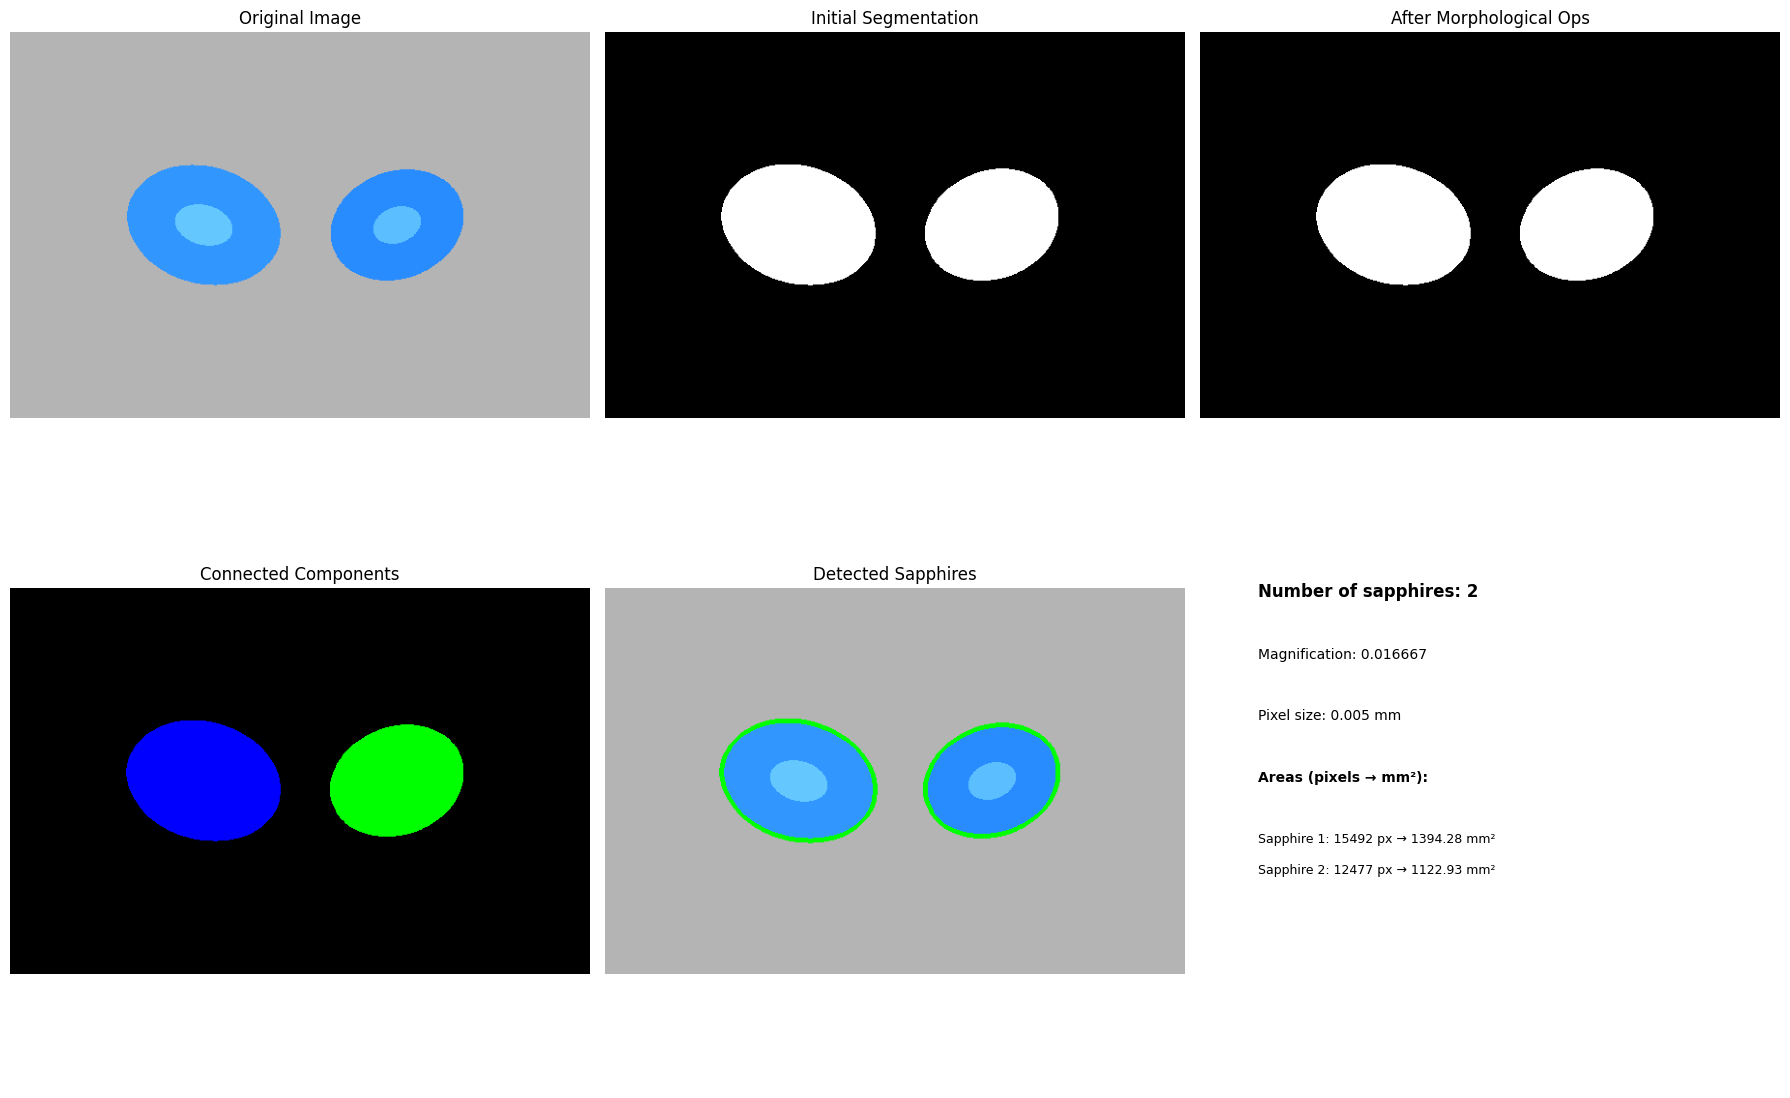

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the sapphire image or use the attached image
img = cv2.imread('../CV Assingment/a1images/a1images/sapphires.jpg')

# If image not found, create synthetic sapphire-like objects
if img is None:
    img = np.zeros((400, 600, 3), dtype=np.uint8)
    # Add gray table background
    img[:] = [180, 180, 180]
    # Add two blue sapphire-like ellipses
    cv2.ellipse(img, (200, 200), (80, 60), 15, 0, 360, (255, 150, 50), -1)  # Blue sapphire 1
    cv2.ellipse(img, (400, 200), (70, 55), -20, 0, 360, (255, 140, 40), -1)  # Blue sapphire 2
    # Add some highlights
    cv2.ellipse(img, (200, 200), (30, 20), 15, 0, 360, (255, 200, 100), -1)
    cv2.ellipse(img, (400, 200), (25, 18), -20, 0, 360, (255, 190, 90), -1)
    print("Using synthetic sapphire image")

# Convert to different color spaces for better segmentation
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Part (a): Segmentation algorithm
# Method 1: Color-based segmentation in HSV space
h, s, v = cv2.split(hsv)

# Create mask for blue sapphires (adjust range as needed)
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([130, 255, 255])
mask_color = cv2.inRange(hsv, lower_blue, upper_blue)

# Method 2: Combine with edge detection for better boundaries
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)

# Combine color mask with edge information
mask_combined = cv2.bitwise_or(mask_color, edges)

# Apply Gaussian blur to smooth the mask
mask_smooth = cv2.GaussianBlur(mask_combined, (5, 5), 0)

# Apply threshold to get binary mask
_, binary_mask = cv2.threshold(mask_smooth, 127, 255, cv2.THRESH_BINARY)

print("Part (a): Segmentation complete")

# Part (b): Morphological operations to fill holes
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))

# Close gaps and fill small holes
mask_closed = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)

# Fill larger holes using flood fill from corners
mask_filled = mask_closed.copy()
h, w = mask_filled.shape
# Flood fill from corners to mark background
cv2.floodFill(mask_filled, None, (0, 0), 128)
cv2.floodFill(mask_filled, None, (w-1, 0), 128)
cv2.floodFill(mask_filled, None, (0, h-1), 128)
cv2.floodFill(mask_filled, None, (w-1, h-1), 128)

# Invert: background becomes 0, filled objects become 255
mask_filled = np.where(mask_filled == 128, 0, 255).astype(np.uint8)

print("Part (b): Morphological operations applied")

# Part (c): Connected components with stats
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask_filled, connectivity=8)

# Filter out background (label 0) and small objects
min_area = 500  # Minimum area threshold
sapphire_areas = []
sapphire_labels = []

for i in range(1, num_labels):  # Skip background (label 0)
    area = stats[i, cv2.CC_STAT_AREA]
    if area > min_area:
        sapphire_areas.append(area)
        sapphire_labels.append(i)

print(f"Part (c): Found {len(sapphire_areas)} sapphires")
for i, area in enumerate(sapphire_areas):
    print(f"Sapphire {i+1}: {area} pixels")

# Part (d): Convert pixel areas to actual areas
# Given: f = 8mm, distance = 480mm
f_mm = 8  # focal length in mm
distance_mm = 480  # distance to table in mm

# Calculate magnification
magnification = f_mm / distance_mm
print(f"Magnification: {magnification:.6f}")

# Assume pixel size (typical for digital cameras)
pixel_size_mm = 0.005  # 5 micrometers per pixel (adjust as needed)

# Calculate actual area per pixel in mm²
mm_per_pixel = pixel_size_mm / magnification
area_per_pixel_mm2 = mm_per_pixel ** 2

print(f"\nPart (d): Actual sapphire areas:")
for i, area_pixels in enumerate(sapphire_areas):
    area_mm2 = area_pixels * area_per_pixel_mm2
    print(f"Sapphire {i+1}: {area_mm2:.2f} mm²")

# Display results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

axes[0,0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0,0].set_title('Original Image')
axes[0,0].axis('off')

axes[0,1].imshow(binary_mask, cmap='gray')
axes[0,1].set_title('Initial Segmentation')
axes[0,1].axis('off')

axes[0,2].imshow(mask_filled, cmap='gray')
axes[0,2].set_title('After Morphological Ops')
axes[0,2].axis('off')

# Create colored label image for visualization
label_img = np.zeros((labels.shape[0], labels.shape[1], 3), dtype=np.uint8)
colors = [(0,0,255), (0,255,0), (255,0,0), (255,255,0), (255,0,255)]
for i, label in enumerate(sapphire_labels):
    label_img[labels == label] = colors[i % len(colors)]

axes[1,0].imshow(label_img)
axes[1,0].set_title('Connected Components')
axes[1,0].axis('off')

# Show original with detected sapphires outlined
result_img = img.copy()
for label in sapphire_labels:
    contours, _ = cv2.findContours((labels == label).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(result_img, contours, -1, (0, 255, 0), 3)

axes[1,1].imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
axes[1,1].set_title('Detected Sapphires')
axes[1,1].axis('off')

# Show statistics
axes[1,2].text(0.1, 0.8, f"Number of sapphires: {len(sapphire_areas)}", fontsize=12, fontweight='bold')
axes[1,2].text(0.1, 0.7, f"Magnification: {magnification:.6f}", fontsize=10)
axes[1,2].text(0.1, 0.6, f"Pixel size: {pixel_size_mm} mm", fontsize=10)
axes[1,2].text(0.1, 0.5, "Areas (pixels → mm²):", fontsize=10, fontweight='bold')
for i, (area_px, area_mm2) in enumerate(zip(sapphire_areas, [a * area_per_pixel_mm2 for a in sapphire_areas])):
    axes[1,2].text(0.1, 0.4-i*0.05, f"Sapphire {i+1}: {area_px} px → {area_mm2:.2f} mm²", fontsize=9)
axes[1,2].set_xlim(0, 1)
axes[1,2].set_ylim(0, 1)
axes[1,2].axis('off')

plt.tight_layout()
plt.show()